In [31]:
import gym
import numpy as np
import random
from timeit import default_timer as timer
from datetime import timedelta
import matplotlib.pylab as plt
import pandas as pd
import seaborn as sns
from collections import defaultdict

import plotting


In [32]:
def gambler_q(exploration_decreasing_decay = 0.0001,gamma = 0.99,n_episodes = 100000,size=100, lr = 0.01, ph=0.35):
    
    nS = size
    nA = size // 2 + 1
    qtable = np.zeros((nS,nA))
    #maximum of iteration per episode
    max_iter_episode = 100

    #initialize the exploration probability to 1
    exploration_proba = 1

    #exploartion decreasing decay for exponential decreasing
    

    # minimum of exploration proba
    min_exploration_proba = 0.01

    #discounted factor
    ch = [0,1]

    #learning rate
    stats = plotting.EpisodeStats(
        episode_lengths=np.zeros(n_episodes),
        episode_rewards=np.zeros(n_episodes))    
    total_rewards_episode = list()
    rewards_per_episode = []
    for e in range(n_episodes):
        #we initialize the first state of the episode
        #print ("EPISODE " + str(e))
        #print ("*************************************")
        current_state = 1
        done = False

        #sum the rewards that the agent gets from the environment
        total_episode_reward = 0
        it = 0
        
        while True:
            it += 1

            if np.random.uniform(0,1) < exploration_proba:
                action = np.random.randint(1, min(current_state, size-current_state)+1)
            else:
                action = np.argmax(qtable[current_state,:])
            
            indx = np.random.choice(ch,1,p=[1-ph,ph])[0]
            if indx == 0:
                next_state = current_state - action
            elif indx == 1:
                next_state = current_state + action
            if next_state == 0:
                done = True
                reward = 0.0
            elif next_state == size:
                done = True
                reward = 1.0
            else:
                done = False
                reward = 0.0

            stats.episode_rewards[e] += reward
            stats.episode_lengths[e] = it
            #env.render()
            # We update our Q-table using the Q-learning iteration
            qtable[current_state, action] = (1-lr) * qtable[current_state, action] +lr*(reward + gamma*max(qtable[next_state,:]))
            total_episode_reward = total_episode_reward + reward
            # If the episode is finished, we leave the for loop
            if done:
                break
            current_state = next_state
        #We update the exploration proba using exponential decay formula 
        exploration_proba = max(min_exploration_proba, np.exp(-exploration_decreasing_decay*e))
        rewards_per_episode.append(total_episode_reward)
    plotting.plot_episode_stats(stats,smoothing_window=1000)
    x = range(size+1)
    # corresponding y axis values
    y = np.argmax(qtable,axis=1)
    print (y)
    # plotting the bars
    plt.bar(x, y, align='center', alpha=0.5)

    # naming the x axis
    plt.xlabel('Capital')
    # naming the y axis
    plt.ylabel('Final policy (stake)')

    # giving a title to the graph
    plt.title('Capital vs Final Policy')

    # function to show the plot
    plt.show()
    #print (np.argmax(qtable,axis=1))
    
    #print (rewards_per_episode)

In [33]:
gambler_q(exploration_decreasing_decay = 0.00001,gamma = 0.5,n_episodes = 100000,size=100, lr = 0.01, ph=0.35)

IndexError: index 100 is out of bounds for axis 0 with size 100

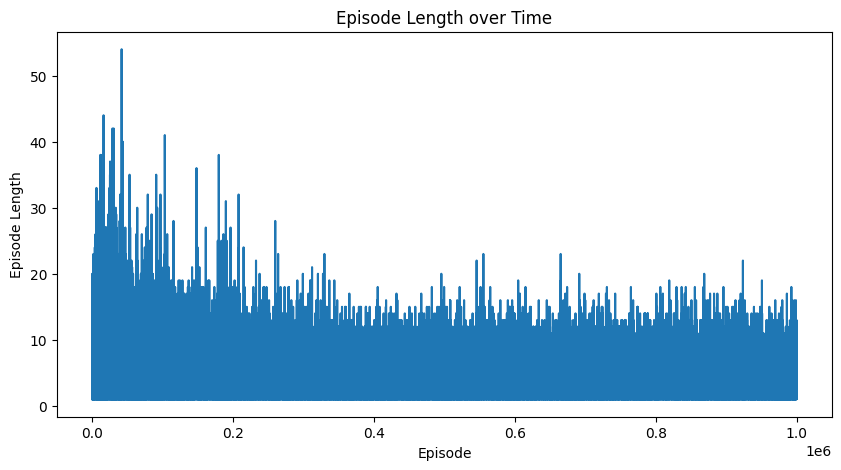

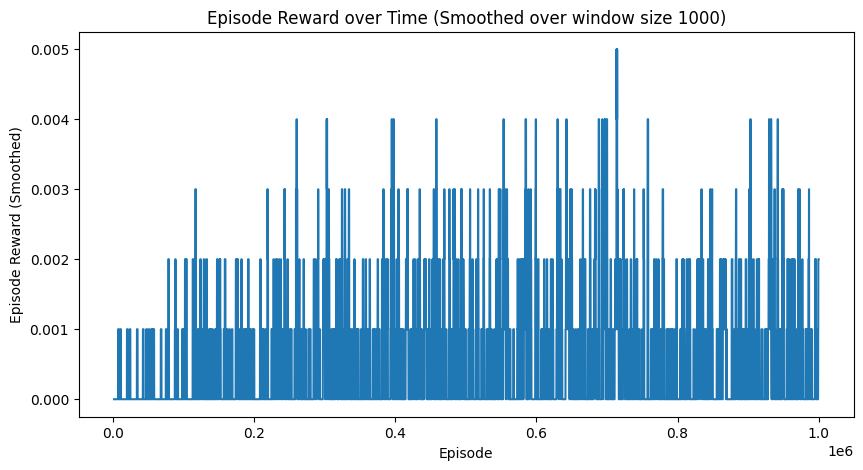

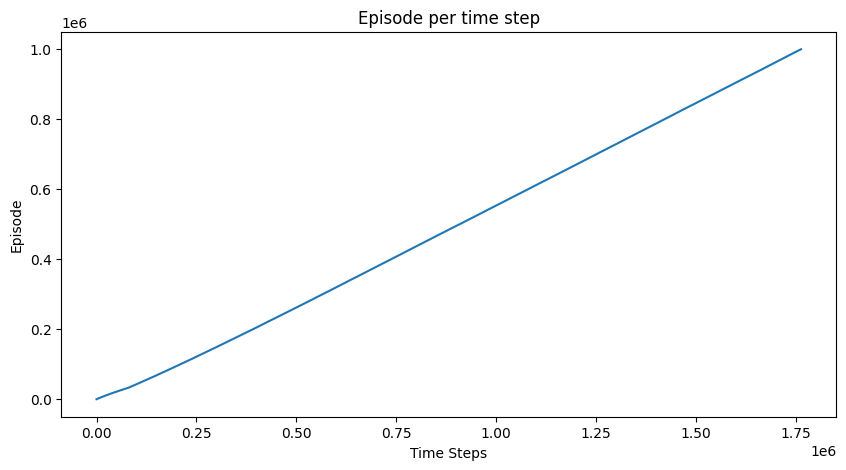

[ 0  1  2  1  3  2  1  7  6  5  4  3  2 12 11 10 14  8  9  6  6  4  3 22
 10 25  1  2  3 21 20 24  2  8  4 15 26  7 12 14 11 22 28 20 19 22 39 34
  3 44 50 49  1 41 34  8 42  6 24 24 22  5 25 17  8  2 15 30 28  2 26  2
 27 12 11 17 14 23  1  6 13 11  5 16  4  2 14 13 11  4  9  9  3  7  1  5
  4  3  1  1  0]


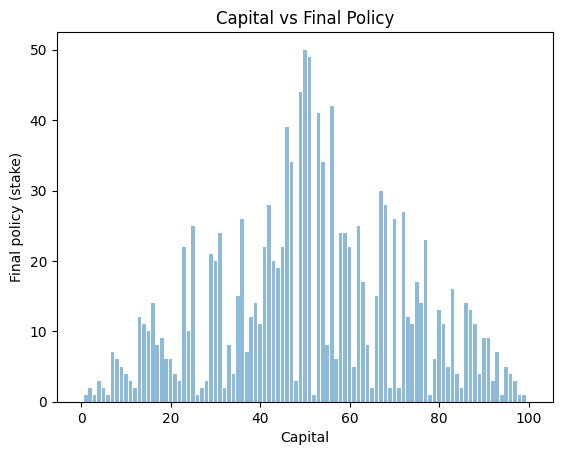

In [27]:
gambler_q(exploration_decreasing_decay = 0.00001,gamma = 0.99,n_episodes = 1000000,size=100, lr = 0.001, ph=0.35)

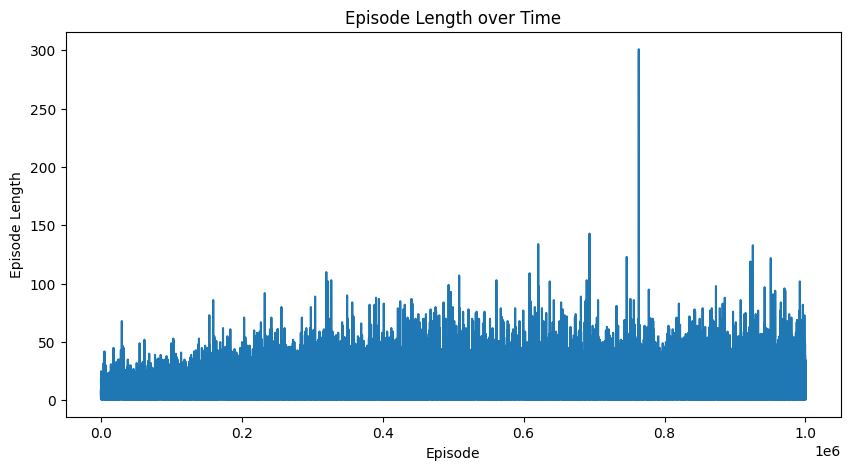

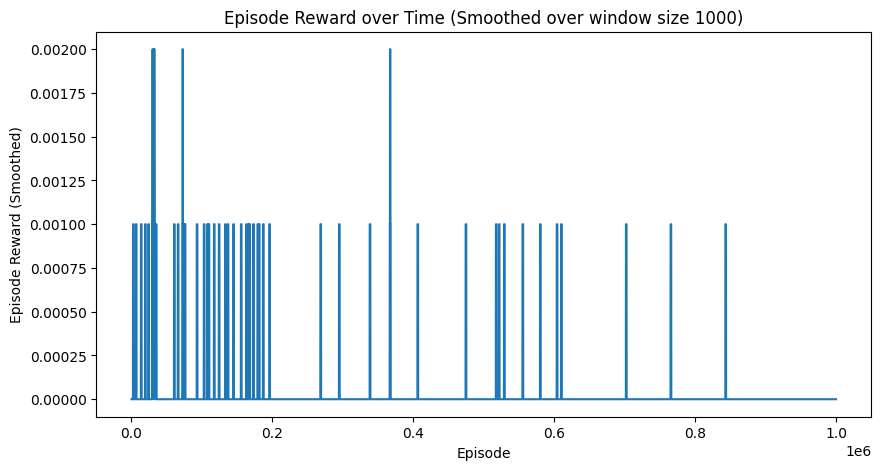

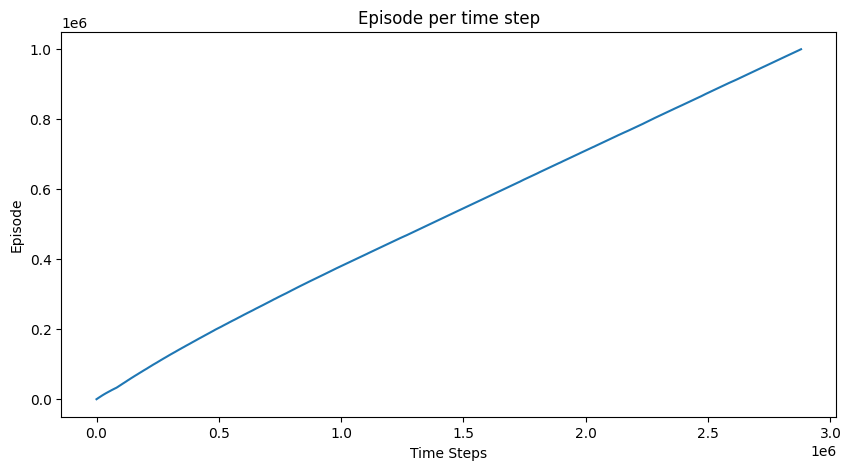

[ 0  1  1  1  1  1  2  2  1  1  1  3  1  1  1  1  1  3  1  5  3  1  2  1
  5 15  2  1 27  7  1  3  3  3  1  5  4  1 22  2  6  5 29 11 32 40 22 24
 46 40 25 46 15  5 14 42 31 19  3 33 39 33 38 16 32 11 10  4 13 24 27 10
 12 22 11  0 24  3  4  3  1 15  6 13  1  1  1 13  8  6 10  6  7  5  6  5
  1  3  2  1  0]


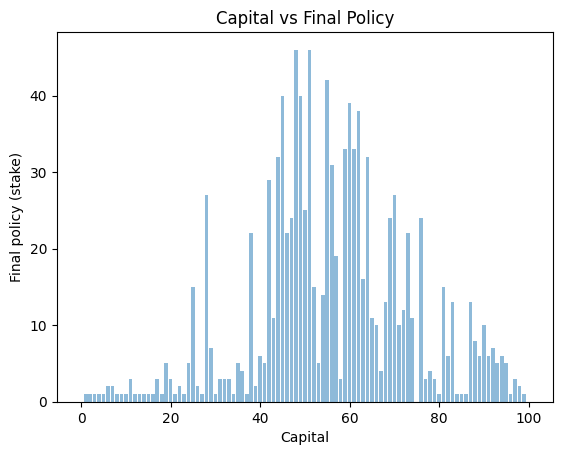

In [28]:
gambler_q(exploration_decreasing_decay = 0.00001,gamma = 0.99,n_episodes = 1000000,size=100, lr = 0.5, ph=0.35)

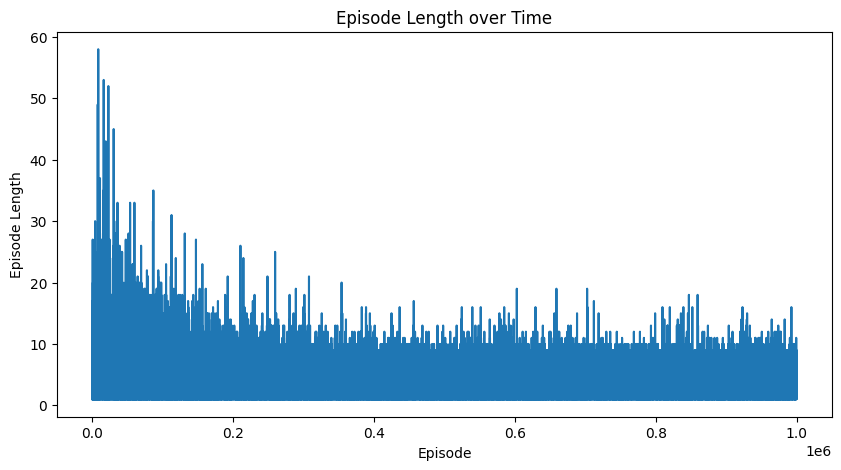

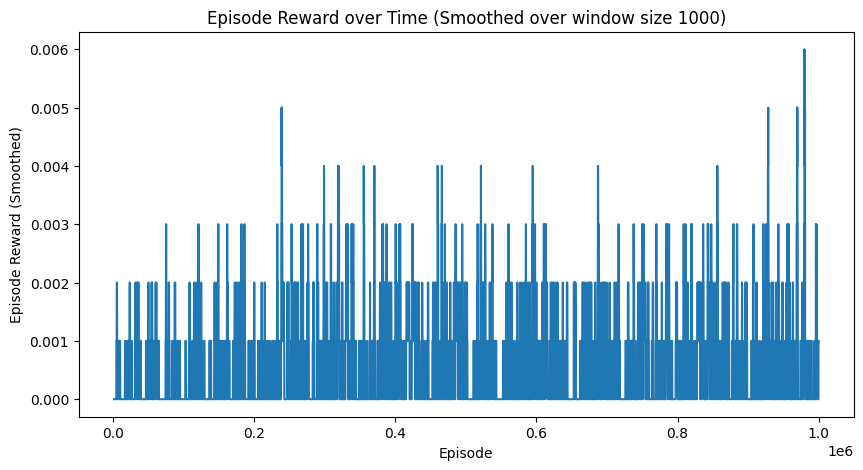

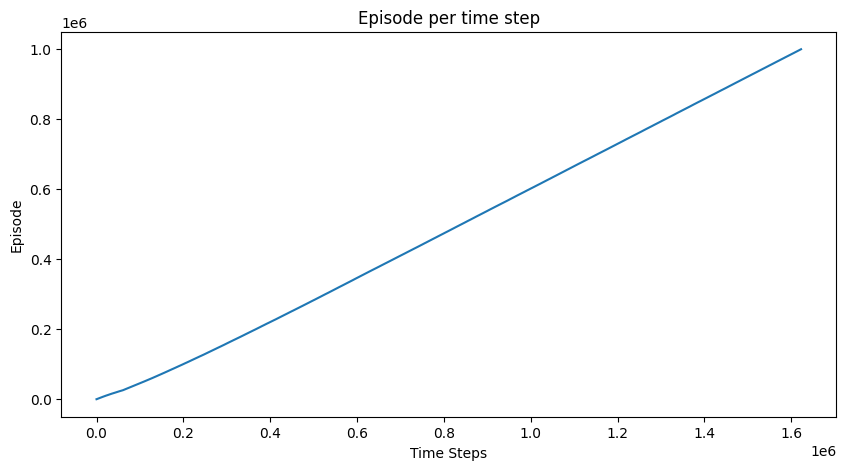

[ 0  1  2  1  4  3  2  7  8  5  4  5  4 12 11 10  9  8  4  3  4  5  8  9
  1 25  1 11  3 22  5  6 20  9 17 31 15 23 24 33 25 26 18  8 42  5 27 22
 47  7 50 41 40  7 17 41 43 29 12 28 20 28 12 32 17 35  7 32  3 23  6 20
 25 26 25 21 19 21 11  3 18 17 14 10  4 13  9 13  7  7  3  5  8  6  2  5
  4  3  2  1  0]


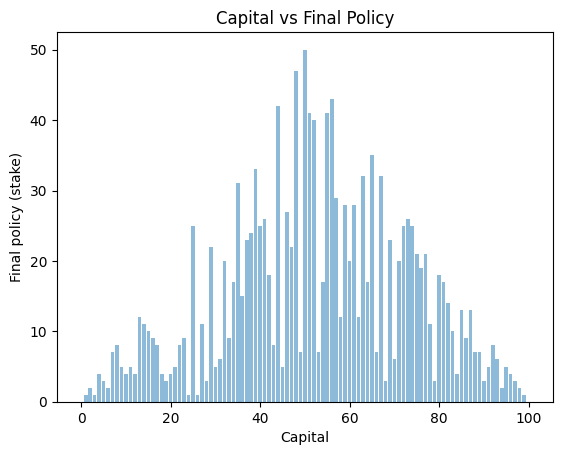

In [30]:
gambler_q(exploration_decreasing_decay = 0.00001,gamma = 0.1,n_episodes = 1000000,size=100, lr = 0.001, ph=0.35)